In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

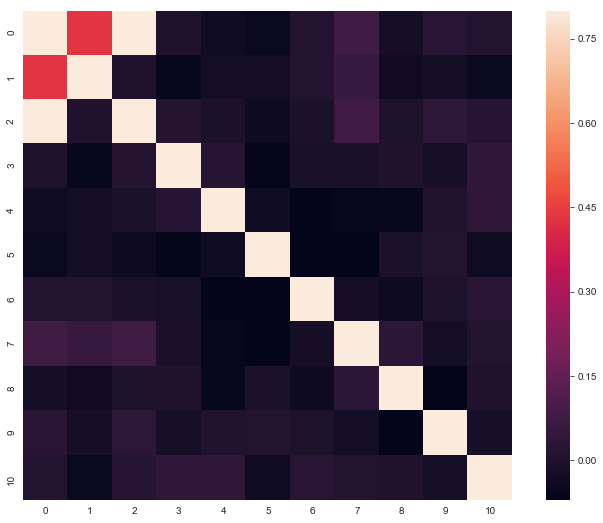

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


R-squared regression: 0.841773565492318
R-squared PLSR: 0.8417734128558669


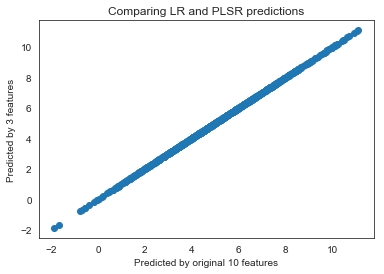

In [3]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc).

The trick to successful PLSR is to select the right number of components to keep. Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

Since this data is randomly generated, you can also play with it by changing how  𝑦  is computed, then observing how different relationships between  𝑦  and  𝑋  play out in PLSR.

In [5]:
# Your PLSR models here.

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# this one is linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Save predicted values.
Y_pred_train = regr.predict(X_train)
Y_pred_test = regr.predict(X_test)


R-squared regression:(training) 0.8425575370470564
R-squared regression:(testing) 0.8376603736096323
R-squared PLSR(training data): 0.8425569829425823
R-squared PLSR(test data): 0.8376628499945293


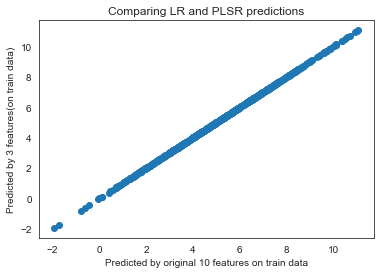

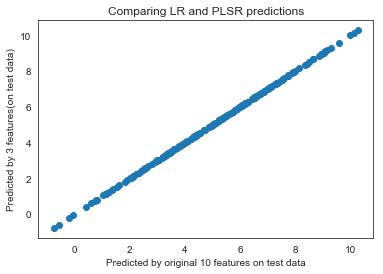

In [6]:
# number of components is 3, train and test data
pls2 = PLSRegression(n_components=3)
pls2.fit(X_train, y_train)

print('R-squared regression:(training)', regr.score(X_train, y_train))
print('R-squared regression:(testing)', regr.score(X_test, y_test))

y_pred_train_PLS = pls2.predict(X_train)
y_pred_test_PLS = pls2.predict(X_test)

print('R-squared PLSR(training data):', pls2.score(X_train, y_train))
print('R-squared PLSR(test data):', pls2.score(X_test, y_test))

plt.scatter(Y_pred_train,y_pred_train_PLS) 
plt.xlabel('Predicted by original 10 features on train data')
plt.ylabel('Predicted by 3 features(on train data)')
plt.title('Comparing LR and PLSR predictions')
plt.show()
plt.scatter(Y_pred_test,y_pred_test_PLS) 
plt.xlabel('Predicted by original 10 features on test data')
plt.ylabel('Predicted by 3 features(on test data)')
plt.title('Comparing LR and PLSR predictions')
plt.show()